In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, BatchNormalization, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=15,
    width_shift_range=0.20,
    height_shift_range=0.10,
)
batch_sizee = 32
img_width = 62
img_height = 62


In [3]:
train_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),
    batch_size=batch_sizee,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
    )
validasi_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),    
    batch_size=batch_sizee,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'
)

Found 14214 images belonging to 2 classes.
Found 2507 images belonging to 2 classes.


In [4]:
# Model CNN dengan swish activation
model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Untuk 2 kelas
])

# Kompilasi model
optimizer = Adam(learning_rate=0.0001)
loss_function = 'binary_crossentropy'  # Gunakan categorical jika one-hot label
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


c:\Program Files\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 31, 31, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 15, 15, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 938,609 (3.58 MB)

 Trainable params: 938,417 (3.58 MB)

 Non-trainable params: 192 (768.00 B)

In [5]:
history = model.fit(
    train_data,
    validation_data=validasi_data,
    epochs=10
)


c:\Program Files\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 181s 402ms/step - accuracy: 0.7996 - loss: 0.4308 - val_accuracy: 0.7152 - val_loss: 0.6291
Epoch 2/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 195s 437ms/step - accuracy: 0.9227 - loss: 0.1942 - val_accuracy: 0.8652 - val_loss: 0.3139
Epoch 3/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 157s 352ms/step - accuracy: 0.9461 - loss: 0.1381 - val_accuracy: 0.8680 - val_loss: 0.3368
Epoch 4/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 100s 225ms/step - accuracy: 0.9653 - loss: 0.0932 - val_accuracy: 0.9226 - val_loss: 0.2077
Epoch 5/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 96s 215ms/step - accuracy: 0.9718 - loss: 0.0798 - val_accuracy: 0.9537 - val_loss: 0.1185
Epoch 6/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.9793 - loss: 0.0621 - val_accuracy: 0.8875 - val_loss: 0.3282
Epoch 7/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.9811 - loss: 0.0582 - val_accuracy: 0.9406 - val_loss: 0.1680
Epoch 8/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.9852 - los

In [6]:
model.save(r"A:\Kuliah\Skrpsi\Program\model_cnn66.h5")



In [15]:
print("Model expects input shape:", model.input_shape)


Model expects input shape: (None, 62, 62, 1)


In [16]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    img = cv2.resize(img, (62, 62))  
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # (62, 62, 1)
    img = np.expand_dims(img, axis=0)   # (1, 62, 62, 1)
    return img.astype(np.float32)


# === 3. Load Semua Gambar Validasi Secara Manual ===
class_names = validasi_data.class_indices  # Ambil label otomatis dari data generator
class_names = {v: k for k, v in class_names.items()}  # Balikkan indeks ke nama kelas

y_true = []
y_pred = []

for image_path, label in zip(validasi_data.filepaths, validasi_data.labels):
    image = preprocess_image(image_path)  # Preprocess gambar
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        continue
    
    prediction = model.predict(image, verbose=0)  # Prediksi model
    predicted_class = 1 if prediction[0][0] > 0.5 else 0  # Threshold 0.5 untuk sigmoid
    
    y_true.append(label)  # Label asli (0 atau 1)
    y_pred.append(predicted_class)  # Label prediksi (0 atau 1)

# === 4. Hitung Confusion Matrix ===
cm = confusion_matrix(np.array(y_true), np.array(y_pred))
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(np.array(y_true), np.array(y_pred))


Confusion Matrix:
 [[1388   14]
 [ 169  936]]


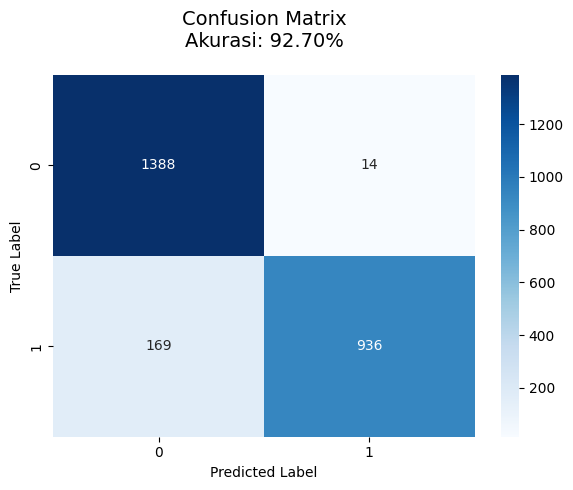

In [17]:


plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                 xticklabels=class_names.keys(), 
                 yticklabels=class_names.keys())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Judul dengan akurasi digabung
plt.title(f"Confusion Matrix\nAkurasi: {accuracy:.2%}", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


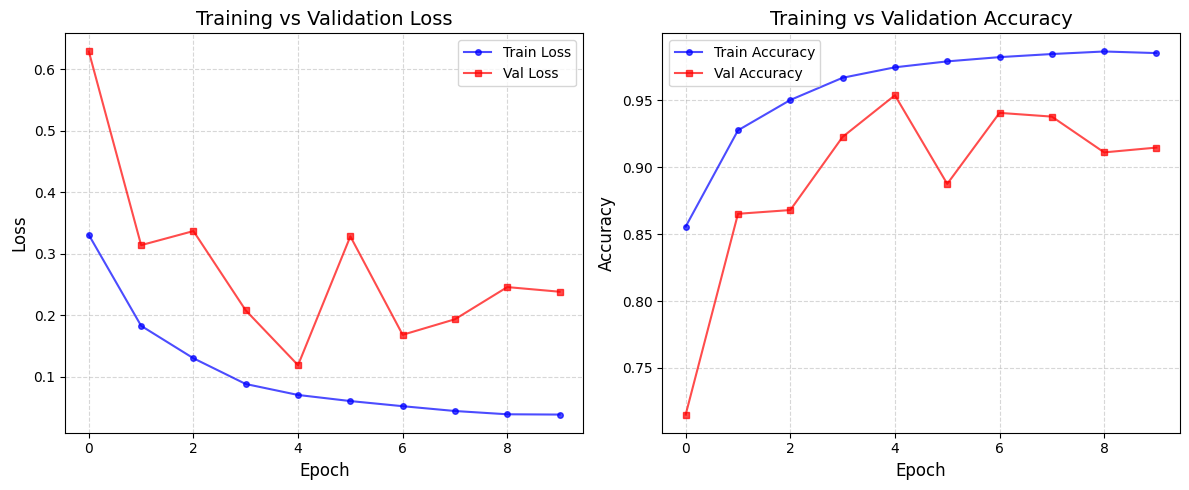

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Lebar 12 inci, tinggi 5 inci

# === Subplot 1: Loss ===
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_loss'], label='Val Loss', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# === Subplot 2: Accuracy ===
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Mencegah tumpang tindih
plt.show()

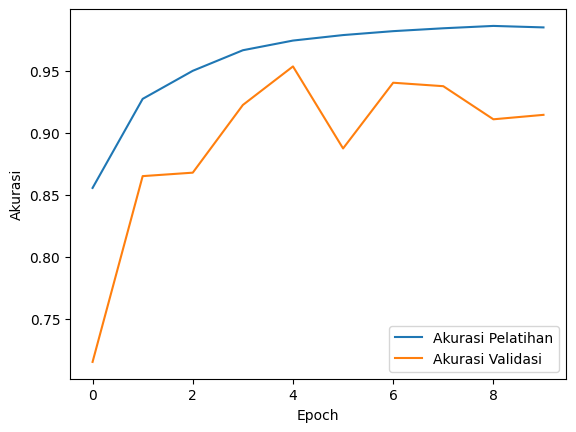

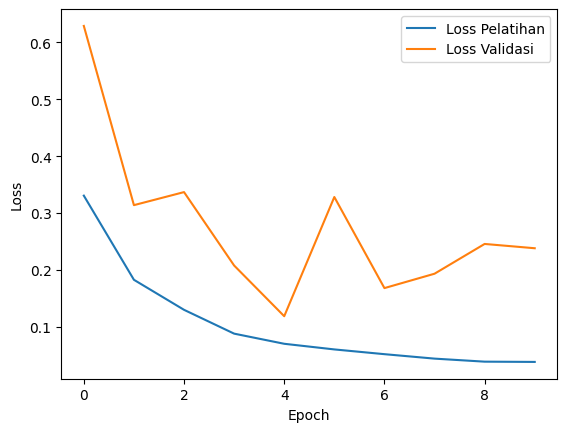

In [19]:
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
import cv2
import os
import pandas as pd

In [21]:


model = tf.keras.models.load_model("A:\Kuliah\Skrpsi\Program\model_cnn6.h5")


In [ ]:


# Path folder gambar
folder_path = "A:/Kuliah/Lomba/Lomba Big Data/Test Data"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None:
            print(f"Berhasil membaca: {file_name}, ukuran: {image.shape}")
        else:
            print(f"Gagal membaca: {file_name}")


In [ ]:

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Image\Test"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# List untuk menyimpan informasi gambar
data = []

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None: # Dapatkan ukuran gambar
            data.append([file_name,img_path])  # Simpan ke list

# Buat DataFrame pandas
df = pd.DataFrame(data, columns=["Nama File","path"])

# Simpan ke file Excel
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx"
df.to_excel(excel_path, index=False)

print(f"Data berhasil disimpan ke {excel_path}")


Data berhasil disimpan ke A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx


In [ ]:
data=pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar(gaboleh diubah).xlsx")
data_shuffled = data.sample(frac=1).reset_index(drop=True)

# Simpan kembali hasil yang sudah diacak ke Excel
data_shuffled.to_excel(r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx", index=False)

print("Data berhasil diacak dan disimpan!")

Data berhasil diacak dan disimpan!


In [ ]:
read= pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx")

In [ ]:
read

,Nama File,path,Actual,Predic
0,person_1684.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_168...,AI FIX,NaN
1,00707_face_4.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00707_face...,Human,NaN
2,person_2034.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_203...,AI FIX,NaN
3,00745_face_4.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00745_face...,Human,NaN
4,person_1637.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_163...,AI FIX,NaN
...,...,...,...,...
877,person_1951.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_195...,AI FIX,NaN
878,02621_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02621_face...,Human,NaN
879,person_1835.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_183...,AI FIX,NaN
880,04406_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\04406_face...,Human,NaN


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # (64, 64, 1)
    img = np.expand_dims(img, axis=0)   # (1, 64, 64, 1)
    return img

# Membaca DataFrame
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)

# Cek nama kolom path
print("Kolom dalam DataFrame:", df.columns)
if "path" in df.columns:
    path_col = "path"
elif "Path" in df.columns:
    path_col = "Path"
else:
    raise ValueError("Kolom path tidak ditemukan dalam Excel!")

# Label kelas
class_labels = {0: "AI FIX", 1: "Human"}

predictions = []
threshold = 0.5

for idx, row in df.iterrows():
    image_path = row[path_col]
    image = preprocess_image(image_path)
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        predictions.append("Error")
        continue

    pred = model.predict(image)  # bisa jadi shape (1,1) atau (1,2)
    # Tentukan probabilitas kelas positif (label 1)
    if pred.shape[-1] == 1:
        prob_pos = pred[0, 0]
    else:
        prob_pos = pred[0, 1]

    # Terapkan threshold
    if prob_pos >= threshold:
        predictions.append(class_labels[1])
    else:
        predictions.append(class_labels[0])

# Simpan hasil
df["Predic"] = predictions
output_path = excel_path  # atau path lain jika mau
df.to_excel(output_path, index=False)
print(f"Hasil prediksi telah disimpan ke {output_path}")


Kolom dalam DataFrame: Index(['Nama File', 'path', 'Actual', 'Predic'], dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)


In [ ]:
df

,Nama File,path,Actual,Predic
0,person_1684.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_168...,AI FIX,AI FIX
1,00707_face_4.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00707_face...,Human,Human
2,person_2034.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_203...,AI FIX,AI FIX
3,00745_face_4.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00745_face...,Human,Human
4,person_1637.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_163...,AI FIX,AI FIX
...,...,...,...,...
877,person_1951.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_195...,AI FIX,AI FIX
878,02621_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02621_face...,Human,Human
879,person_1835.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_183...,AI FIX,AI FIX
880,04406_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\04406_face...,Human,Human


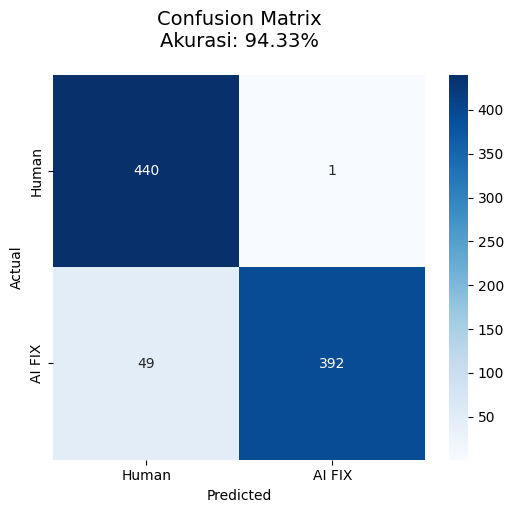

In [ ]:
actual = df["Actual"]
predicted = df["Predic"]
cm = confusion_matrix(actual, predicted, labels=["AI FIX", "Human"])
accuracy = accuracy_score(np.array(df["Actual"]), np.array(df["Predic"]))

# Buat heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI FIX"], yticklabels=["Human", "AI FIX"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix\nAkurasi: {accuracy:.2%}", fontsize=14, pad=20)

plt.show()

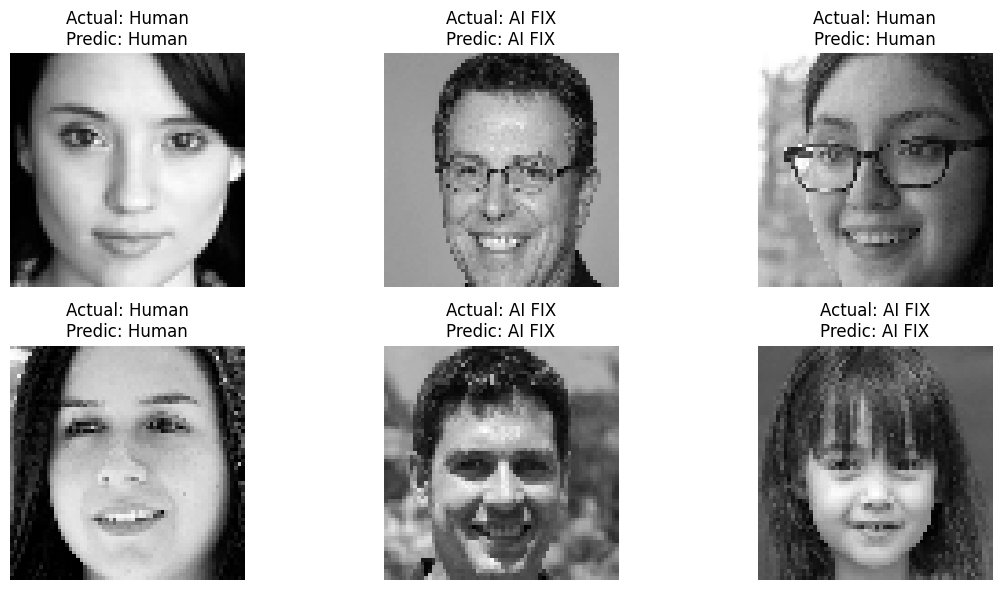

In [ ]:

# Acak data dan ambil 6 gambar pertama yang tidak error
df_filtered = df[df["Predic"] != "Error"].sample(frac=1).head(6)

# Buat plot gambar
plt.figure(figsize=(12, 6)) 

for i, row in enumerate(df_filtered.itertuples()):
    image_path = row.path  # Sesuaikan dengan nama kolom di Excel
    actual_label = row.Actual  # Label sebenarnya
    predicted_label = row.Predic  # Prediksi dari model

    # Baca dan proses gambar
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Resize agar sesuai
    else:
        continue  # Jika gambar tidak valid, skip

    # Plot gambar
    plt.subplot(2, 3, i + 1)  # Grid 2x3
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_label}\nPredic: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


                                                 Path  Prediksi  \
0     A:\Kuliah\Skrpsi\Program\Test\download (10).jpg         1   
1         A:\Kuliah\Skrpsi\Program\Test\Face (1).jpeg         0   
2         A:\Kuliah\Skrpsi\Program\Test\Face (2).jpeg         0   
3         A:\Kuliah\Skrpsi\Program\Test\Face (3).jpeg         1   
4         A:\Kuliah\Skrpsi\Program\Test\Face (4).jpeg         0   
5         A:\Kuliah\Skrpsi\Program\Test\Face (5).jpeg         0   
6   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         1   
7   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         1   
8   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         1   
9   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         0   
10  A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         1   

    Confidence (%)  
0            65.46  
1             0.00  
2             0.20  
3            72.21  
4             0.19  
5             0.02  
6            90.41  
7            97.34  
8     

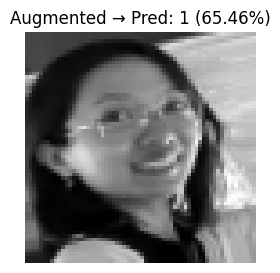

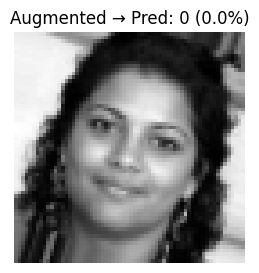

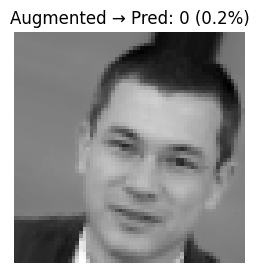

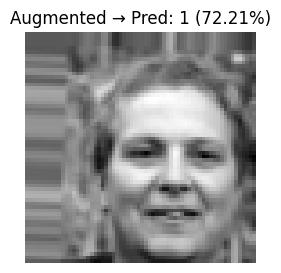

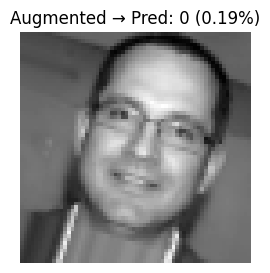

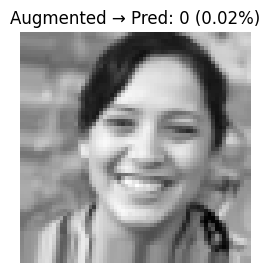

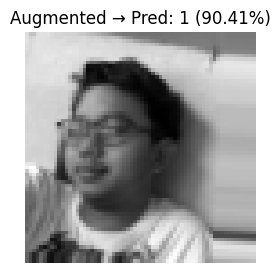

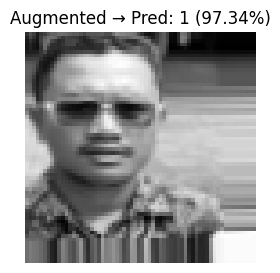

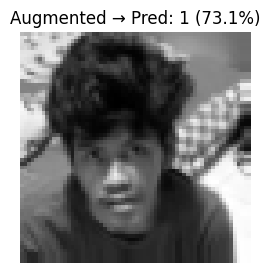

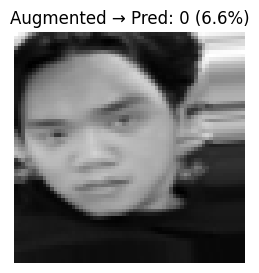

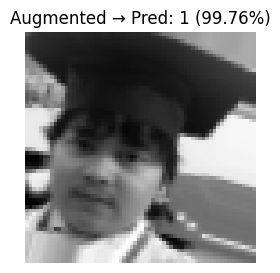

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# 1. Buat ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.15
)

# 2. Load model
model = load_model('A:/Kuliah/Skrpsi/Program/model_cnn6.h5')

# 3. Path folder
folder_path = r"A:\Kuliah\Skrpsi\Program\Test"
file_list = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]

results = []
threshold = 0.5

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    # Baca grayscale & resize
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Gagal membaca: {file_name}")
        continue

    img = cv2.resize(img, (64,64), interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0        # buat konsisten dengan training
    img = np.expand_dims(img, axis=-1)         # (64,64,1)

    # AUGMENTASI (hanya satu transform random)
    aug = datagen.random_transform(img)        # still shape (64,64,1)
    aug_batch = np.expand_dims(aug, axis=0)    # (1,64,64,1)

    # PREDIKSI
    pred = model.predict(aug_batch, verbose=0)[0][0]
    label = 1 if pred > threshold else 0
    score = round(pred*100,2)

    # Simpan result plus augmented image
    results.append({
        "path": img_path,
        "augmented": aug,           # tambahkan array aug di sini
        "label": label,
        "score": score
    })

# Buat DataFrame & CSV (tanpa menyertakan image array)
df = pd.DataFrame([{
    "Path": r["path"],
    "Prediksi": r["label"],
    "Confidence (%)": r["score"]
} for r in results])
df.to_csv("Data_Test_wajah_augmented.csv", index=False)
print(df)

# Tampilkan **hasil preprocessing** (gambar yang sudah di-augment)
for r in results:
    aug_img = r["augmented"].squeeze()   # (64,64)
    plt.figure(figsize=(3,3))
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"Augmented → Pred: {r['label']} ({r['score']}%)")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
                                          Path Gambar  Prediksi  Akurasi
0     A:\Kuliah\Skrpsi\Program\Test\download (10).jpg         1    99.55
1         A:\Kuliah\Skrpsi\Program\Test\Face (1).jpeg         0     0.00
2         A:\Kuliah\Skrpsi\Program\Test\Face (2).jpeg         0     0.00
3         A:\Kuliah\Skrpsi\Program\Test\Face (3).jpeg         0     0.00
4         A:\Kuliah\Skrpsi\Program\Test\Face (4).jpeg         0     0.12
5         A:\Kuliah\Skrpsi\Program\Test\Face (5).jpeg         0     0.00
6   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         0    49.62
7   A:\Kuliah\Skrpsi\Program\Test\Wh

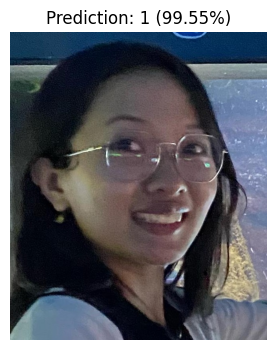

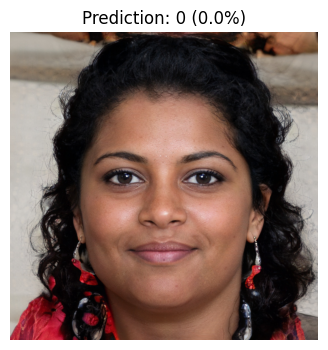

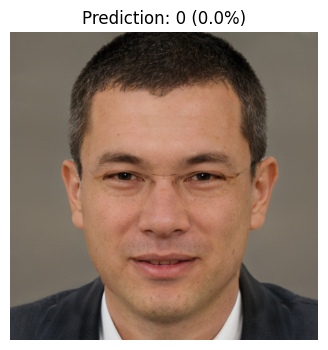

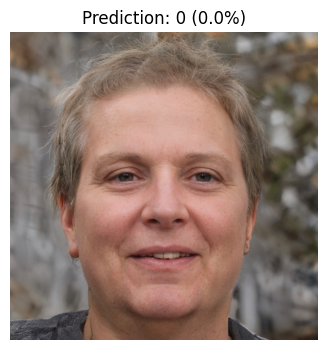

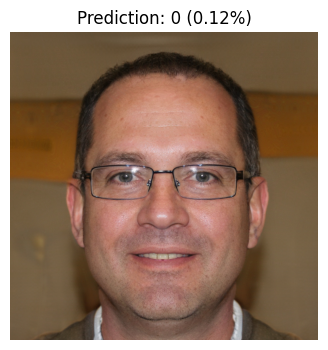

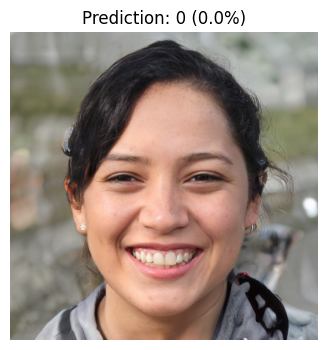

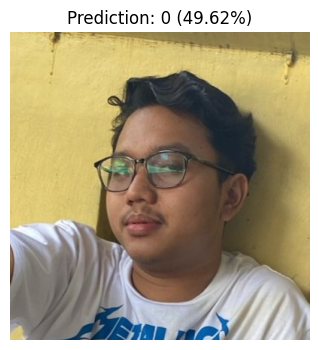

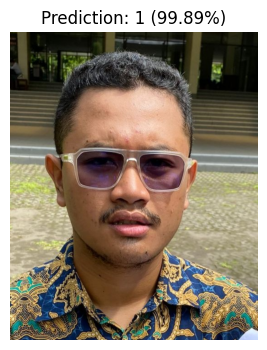

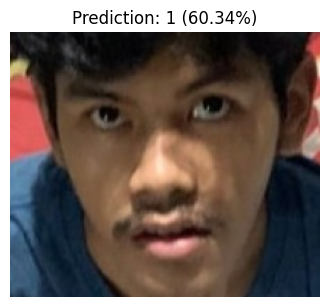

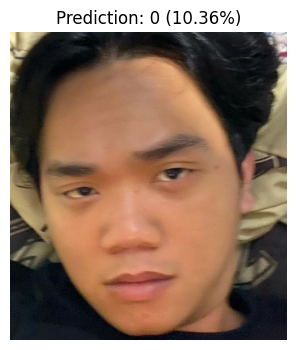

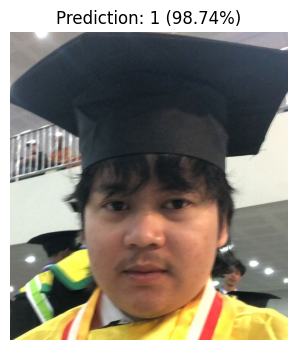

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Test"

# Ambil daftar file gambar
file_list = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Simpan hasil prediksi
predictions = []

# Threshold untuk klasifikasi biner
threshold = 0.5  # Ubah sesuai kebutuhan

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    
    # Baca gambar dalam grayscale untuk preprocessing
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Preprocessing untuk prediksi
        image_resized = cv2.resize(image, (64, 64))  # Resize ke ukuran input model
        image_resized = image_resized / 255.0  # Normalisasi
        image_resized = np.expand_dims(image_resized, axis=-1)  # Tambahkan channel grayscale
        image_resized = np.expand_dims(image_resized, axis=0)  # Tambahkan batch dimensi

        # Lakukan prediksi
        pred = model.predict(image_resized)[0][0]  # Ambil hasil sigmoid (nilai antara 0 dan 1)
        
        # Tentukan kelas berdasarkan threshold
        predicted_label = 1 if pred > threshold else 0
        confidence_score = round(pred * 100, 2)  # Ubah ke persen (%)

        # Simpan hasil prediksi
        predictions.append({
            "Path Gambar": img_path,
            "Prediksi": predicted_label,
            "Akurasi": confidence_score
        })

    else:
        print(f"Gagal membaca: {file_name}")

# Konversi hasil prediksi ke DataFrame
df = pd.DataFrame(predictions)

# Simpan ke CSV jika diperlukan
df.to_csv("Data_Test_wajah_asli_teman-teman.csv", index=False)

# **Tampilkan hasil dalam bentuk tabel**
print(df)

# **Tampilkan gambar satu per satu**
for row in df.itertuples():
    image_path = row._1  # Path Gambar
    predicted_label = row.Prediksi
    confidence_score = row.Akurasi

    # Baca gambar asli dalam warna (RGB) tanpa preprocessing
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB agar warnanya benar

    if img is not None:
        plt.figure(figsize=(4, 4))  # Atur ukuran gambar
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label} ({confidence_score}%)")
        plt.axis("off")
        plt.show()  # Tampilkan satu gambar lalu tunggu sebelum lanjut
